In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

/Users/cookie/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
import keras; print(keras.__version__);

2.1.6


In [4]:
sample_size = 1000
sampleN_train = sample_size
sampleN_test = int(sample_size*.1)

x_train = x_train[0:sampleN_train]
x_test = x_test[0:sampleN_test]
y_train = y_train[0:sampleN_train]
y_test = y_test[0:sampleN_test]

In [5]:
import numpy as np
np.random.seed(123) 

In [6]:
from matplotlib import pyplot as plt

# Uncomment in python editors so plot will display
#plt.interactive(False)

plt.imshow(x_train[0])

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [8]:
x_train.shape

(1000, 28, 28, 1)

In [9]:
x_train /= 255
x_test /= 255

In [10]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [13]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/cookie/anaconda2/lib/python2.7/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3028 - acc: 0.0910
Epoch 2/3
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3021 - acc: 0.1150
Epoch 3/3
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3011 - acc: 0.1150
softmax 0.11000
Epoch 1/3
1000/1000 [==============================] - 3s 3ms/step - loss: 4.4920 - acc: 0.1050
Epoch 2/3
1000/1000 [==============================] - 2s 2ms/step - loss: 2.3312 - acc: 0.1520
Epoch 3/3
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6322 - acc: 0.4210
softplus 0.51000
Epoch 1/3
1000/1000 [==============================] - 3s 3ms/step - loss: 1.3735 - acc: 0.5240A: 0s - loss: 1.3899 - acc: 0.51
Epoch 2/3
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7683 - acc: 0.7270
Epoch 3/3
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6498 - acc: 0.7540
softsign 0.75000
Epoch 1/3
1000/1000 [==============================] -

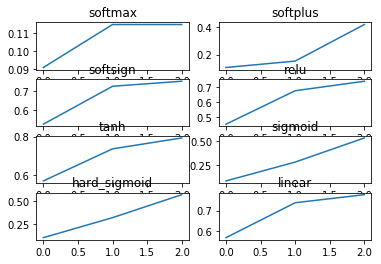

In [17]:
# Define contant parameters for this test
batch_size = 32
nb_epoch = 3
optimizer = 'adam'
metrics = ['accuracy']
loss ='categorical_crossentropy'

# Define Variable parameters for test
activation_func = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

# Plot placeholder
figure = plt.figure()

for i, f in enumerate(activation_func):
    name = "my_model_%d_%s_%d_%d" % (sample_size,f,batch_size,nb_epoch)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation=f))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1000, activation=f))
    model.add(Dense(10, activation='softmax'))

    # Install pydot and graphiz to plot a flow chart of the layers
    #from keras.utils import plot_model
    #plot_model(model, to_file=concat(name,'.png'), show_shapes=True, show_layer_names=True)

    # In[108]:
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)
    # In[109]:
    history = model.fit(x_train, y_train,
              batch_size=batch_size, nb_epoch=nb_epoch, verbose=1)
    # In[110]:
    score = model.evaluate(x_test, y_test, verbose=0)

    # In[111]:
    print "%s %.5f" % (f, score[1])

    # plot metrics
    figure.add_subplot(4, 2, i+1)
    plt.plot(history.history['acc'])
    plt.title(f)

    # In[112]:
    save_as = "fashion_mnist/%s" % name
    model.save(save_as)

In [18]:
plt.show()